In [2]:
# importing necessary library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# to building model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,roc_curve


In [3]:
from google.colab import files
import io
try:
  uploaded
except:
  uploaded = files.upload()

Saving loan_data.csv to loan_data.csv


In [4]:
data=pd.read_csv("loan_data.csv")
df=data.copy()
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948.0,0.0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561.0,No,1
1,21,female,High School,12282.0,0.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504.0,Yes,0
2,25,female,High School,12438.0,3.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635.0,No,1
3,23,female,Bachelor,79753.0,0.0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675.0,No,1
4,24,male,Master,66135.0,1.0,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586.0,No,1


In [5]:
# shape of data
df.shape

(45001, 14)

- there are 45001 rows and 14 columns.

In [6]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45001 entries, 0 to 45000
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45001 non-null  object 
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  float64
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  float64
 12  previous_loan_defaults_on_file  

- age is showing object.but it should be int.
- Rest of the feature has correct datatypes

In [7]:
# checking unique values
df["person_age"].unique()

array(['22', '21', '25', '23', '24', '26', '144', '123', '20', '32', '34',
       '29', '33', '28', '35', '31', '27', '30', '36', '40', '50', '45',
       '37', '39', '44', '43', '41', '46', '38', '47', '42', '48', '49',
       '58', '65', '51', '53', '66', '61', '54', '57', '59', '62', '60',
       '55', '52', '64', '70', '78', '69', '56', '73', '63', '94', '80',
       '84', '76', '67', '116', '109', 'Total'], dtype=object)

In [8]:
# Replacing total to nan
df["person_age"]=df["person_age"].replace('Total',np.nan)

In [9]:
# converting age into int
df["person_age"]=df["person_age"].astype(float)

In [10]:
# checking statical summary of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45001.0,0.444435,47.140714,0.00,0.00,0.00,0.00,10000.00


- Person_age average is around 27,min. is 20 and max. is 144 which is not possible.will fix it later.
- person_income average is around 80319, min. is 8000 and max is 7200766.
- loan amount is around 9583, min is 6314 and max is 35000.
- loan_int_rate average is around 11, min. is 4.4 and max is 20 %.
- credit score average is around 632, min. is 390 and max is 850.
- Loan status average is around 47, min. is 0,max is 10000.
- there are few missing values.

## EDA

#### *person_age*

In [11]:
# checking person age
df["person_age"].unique()

array([ 22.,  21.,  25.,  23.,  24.,  26., 144., 123.,  20.,  32.,  34.,
        29.,  33.,  28.,  35.,  31.,  27.,  30.,  36.,  40.,  50.,  45.,
        37.,  39.,  44.,  43.,  41.,  46.,  38.,  47.,  42.,  48.,  49.,
        58.,  65.,  51.,  53.,  66.,  61.,  54.,  57.,  59.,  62.,  60.,
        55.,  52.,  64.,  70.,  78.,  69.,  56.,  73.,  63.,  94.,  80.,
        84.,  76.,  67., 116., 109.,  nan])

- 144 age not possible because oldest human in the world is 116 year.

In [12]:
# replace wrong data
df["person_age"]=df["person_age"].replace([144,123,116],np.nan)

- Replace wrong data

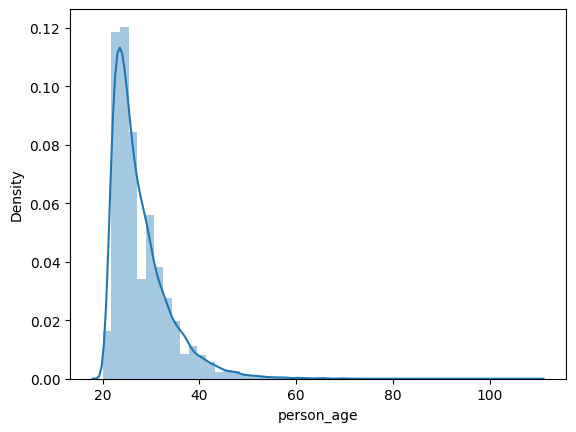

In [13]:
# checking person_data
sns.distplot(df["person_age"]);

#### *person_gender*

In [14]:
# checking unique_values
df["person_gender"].unique()

array(['female', 'male', nan], dtype=object)

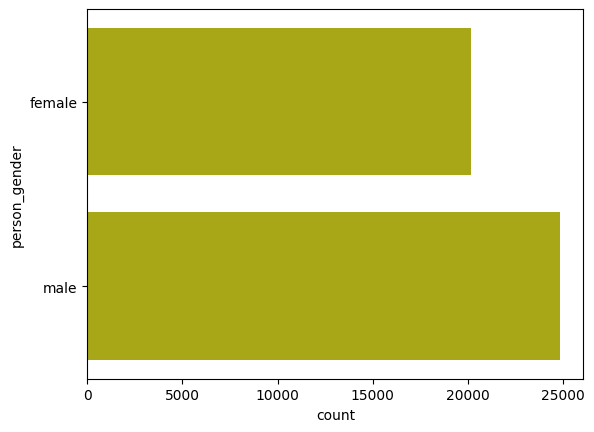

In [15]:
# checking gender
sns.countplot(df["person_gender"],color="y");

#### *person_education*

In [16]:
# checking unique values of person education
df["person_education"].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate', nan],
      dtype=object)

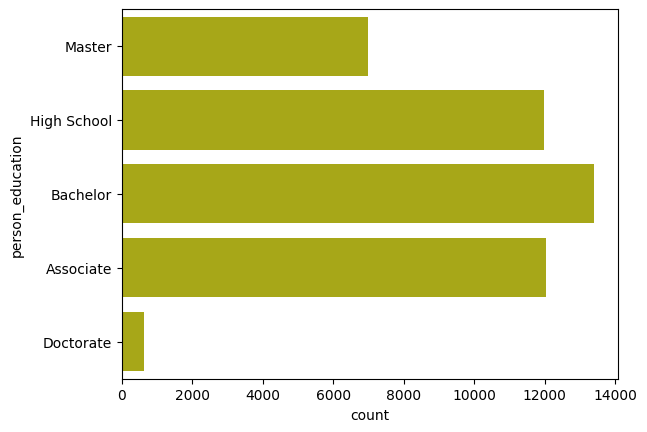

In [17]:
# checking distribution of person_education
sns.countplot(df["person_education"],color="y");

#### *person_income*

In [18]:
# checking unique values
df["person_income"].unique()

array([71948., 12282., 12438., ..., 56942., 33164.,    nan])

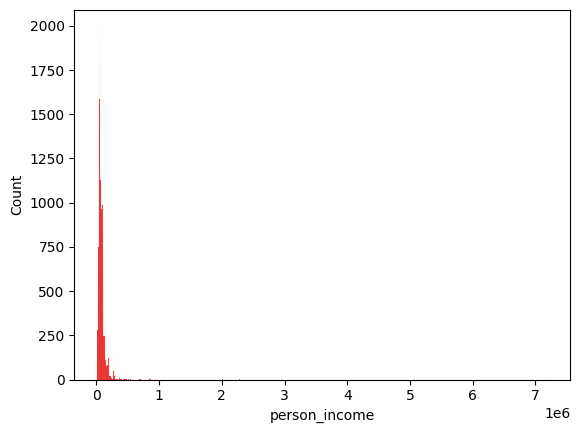

In [19]:
# checking distribution of person income
sns.histplot(df,x="person_income",color="r");

#### *person_emp_exp*

In [20]:
# checking person_emp_exp unique
df["person_emp_exp"].unique()

array([  0.,   3.,   1.,   5.,   4.,   2.,   7.,   6., 125.,   8., 121.,
       101., 100.,  12.,  10.,   9.,  14.,  13.,  11.,  15.,  16.,  17.,
        19.,  28.,  25.,  18.,  24.,  22.,  20.,  23.,  21.,  31.,  26.,
        27.,  29.,  32.,  30., 124.,  40.,  43.,  33.,  44.,  34.,  42.,
        37.,  45.,  36.,  41.,  47.,  38.,  39.,  35.,  57.,  46.,  49.,
        48.,  50.,  76.,  62.,  61.,  58.,  93.,  85.,  nan])

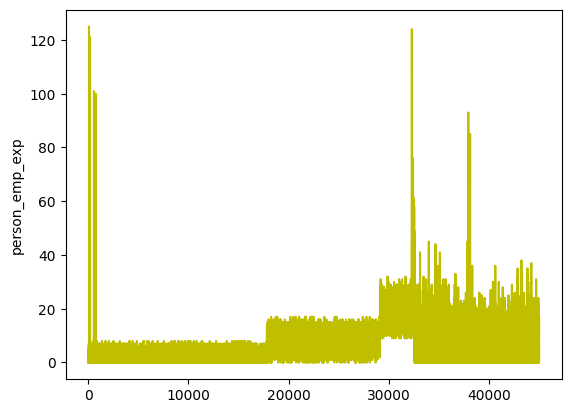

In [21]:
# checking distribution
sns.lineplot(df["person_emp_exp"],color="y");

#### *loan_int_rate*

In [22]:
# checking unique values of loan_int_rate
df.loan_int_rate.unique()

array([16.02, 11.14, 12.87, ..., 19.8 , 16.92,   nan])

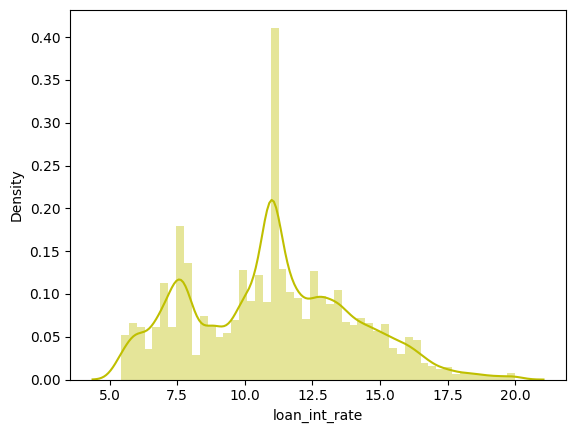

In [23]:
# checking distribution of loan_int_rate
sns.distplot(df["loan_int_rate"],color="y");

#### *credit_score*

In [24]:
# checking credit score unique values
df["credit_score"].unique()

array([561., 504., 635., 675., 586., 532., 701., 585., 544., 640., 621.,
       651., 573., 708., 583., 670., 663., 694., 709., 679., 684., 662.,
       691., 600., 654., 626., 607., 700., 553., 589., 681., 567., 669.,
       606., 582., 649., 602., 616., 631., 637., 695., 620., 622., 645.,
       624., 570., 648., 652., 559., 623., 609., 579., 688., 661., 562.,
       664., 564., 598., 557., 677., 690., 599., 604., 601., 634., 671.,
       789., 538., 587., 683., 518., 617., 668., 673., 706., 536., 689.,
       595., 584., 642., 614., 597., 625., 603., 643., 508., 505., 593.,
       686., 646., 697., 615., 687., 650., 588., 658., 531., 665., 703.,
       594., 618., 574., 577., 653., 630., 660., 639., 612., 628., 592.,
       580., 678., 672., 613., 566., 718., 484., 699., 656., 659., 636.,
       554., 807., 578., 674., 608., 569., 629., 560., 548., 667., 676.,
       581., 655., 551., 529., 666., 576., 633., 611., 657., 647., 542.,
       692., 545., 540., 525., 537., 641., 539., 56

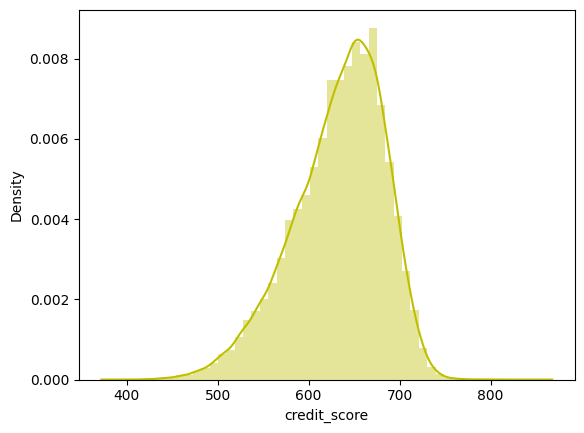

In [25]:
# checking plot of credit score
sns.distplot(df["credit_score"],color="y");

#### *person_home_ownership*

In [26]:
# checking unique value
df["person_home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', nan], dtype=object)

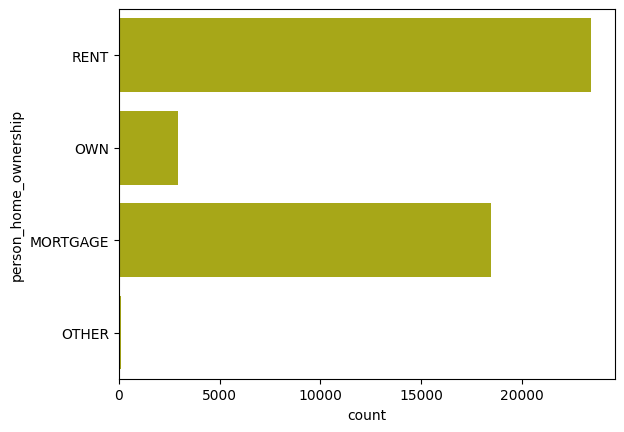

In [27]:
# checking plot of person home ownership
sns.countplot(df["person_home_ownership"],color="y");

#### *loan_percent_income*

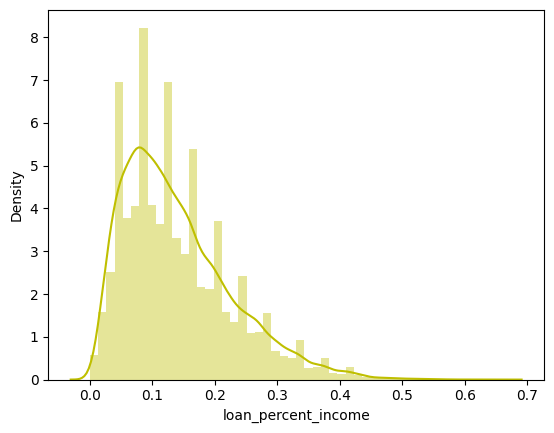

In [28]:
# ploting loan present income
sns.distplot(df["loan_percent_income"],color="y");

#### *previous_loan_defaults_on_file*

In [29]:
# chrcking unique values of previous loan defaults
df["previous_loan_defaults_on_file"].unique()

array(['No', 'Yes', nan], dtype=object)

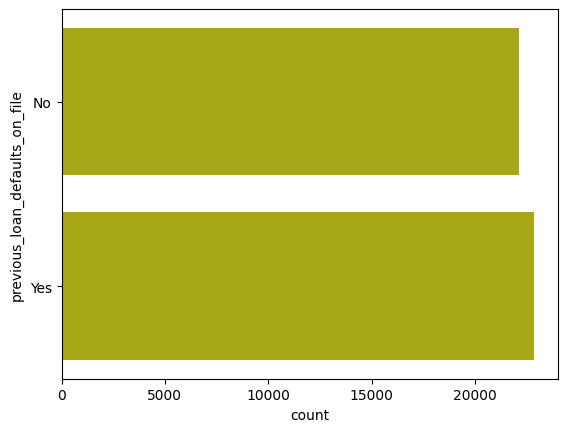

In [30]:
# ploting previous loan defaults
sns.countplot(df["previous_loan_defaults_on_file"],color="y");

#### *loan_amnt*

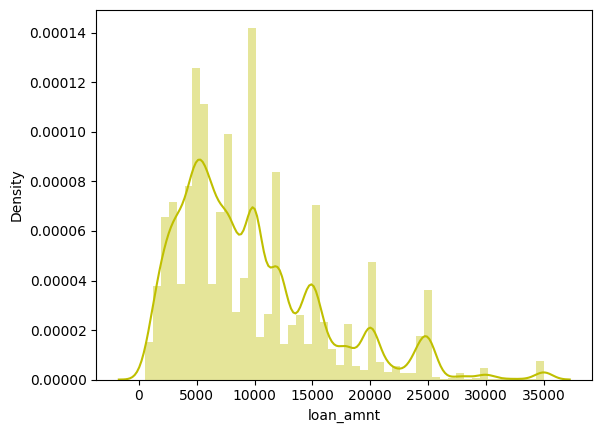

In [31]:
# ploting loan_amnt
sns.distplot(df["loan_amnt"],color="y");

#### *loan_intent*

In [32]:
# checking unique values of loan intent
df["loan_intent"].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION', nan], dtype=object)

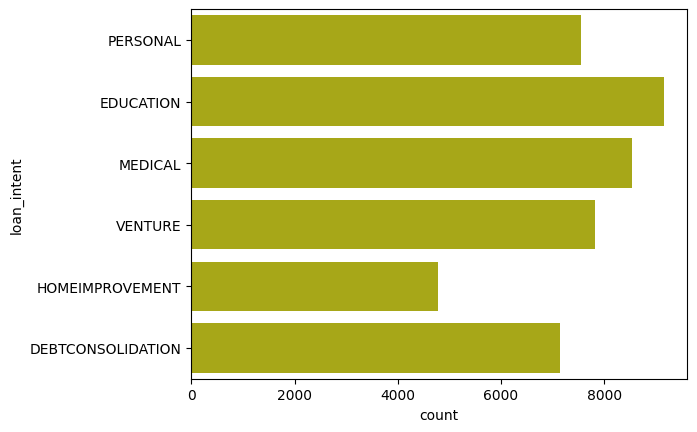

In [33]:
# ploting loan intent
sns.countplot(df["loan_intent"],color="y");

#### *cb_person_cred_hist_length*

In [34]:
# checking unique value of credit hist length
df["cb_person_cred_hist_length"].unique()

array([ 3.,  2.,  4.,  8.,  7.,  6.,  9., 10.,  5., 11., 16., 15., 12.,
       13., 17., 14., 25., 28., 27., 22., 19., 29., 23., 26., 20., 21.,
       30., 24., 18., nan])

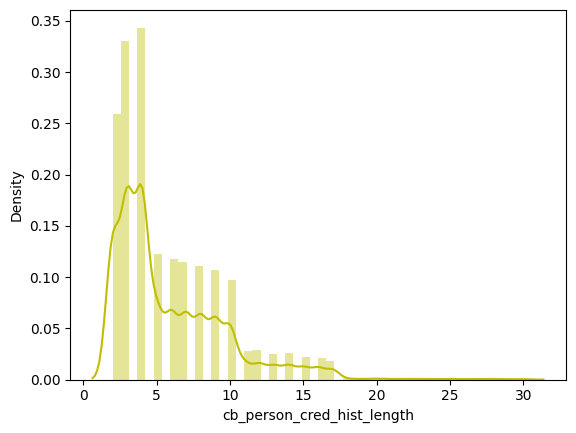

In [35]:
# ploting cred hist length
sns.distplot(df["cb_person_cred_hist_length"],color="y");

#### *loan_status*

In [36]:
# checking unique values
df["loan_status"].unique()


array([    1,     0, 10000])

In [37]:
# Replace 10000 in 'loan_status' with NaN
df['loan_status'] = df['loan_status'].replace(10000, np.nan)

In [38]:
# # ploting loan_status
# sns.countplot(df,x="loan_status",color="y");

## Data preprocessing

In [39]:
# checking missing values
df.isnull().sum()

,0
person_age,7
person_gender,1
person_education,1
person_income,1
person_emp_exp,1
person_home_ownership,1
loan_amnt,1
loan_intent,1
loan_int_rate,1
loan_percent_income,1


- there are few missin value present in data

In [40]:
# checking duplicates value
df.duplicated().sum()

0

- there are no duplicates

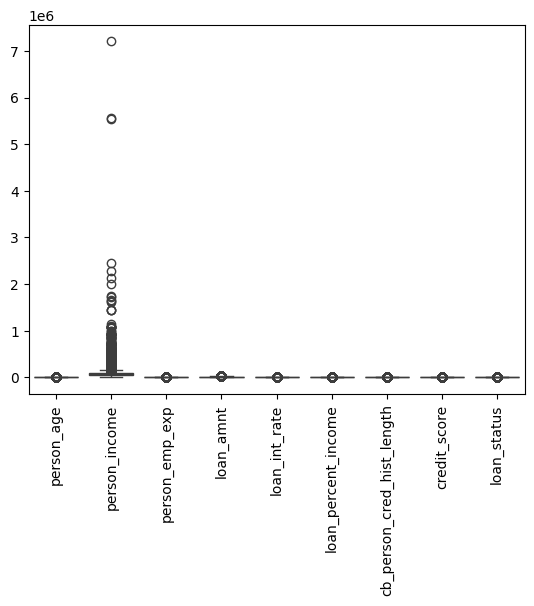

In [41]:
# checking outlier
plt.xticks(rotation=90)
sns.boxplot(df);

- there are few outlier present in data

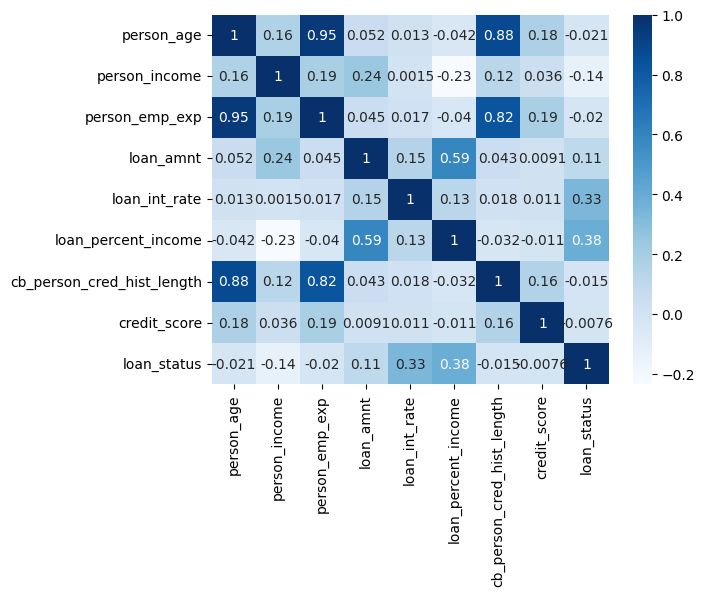

In [42]:
# checking correleations
num=df.select_dtypes(include="number")
sns.heatmap(num.corr(),annot=True,cmap="Blues");

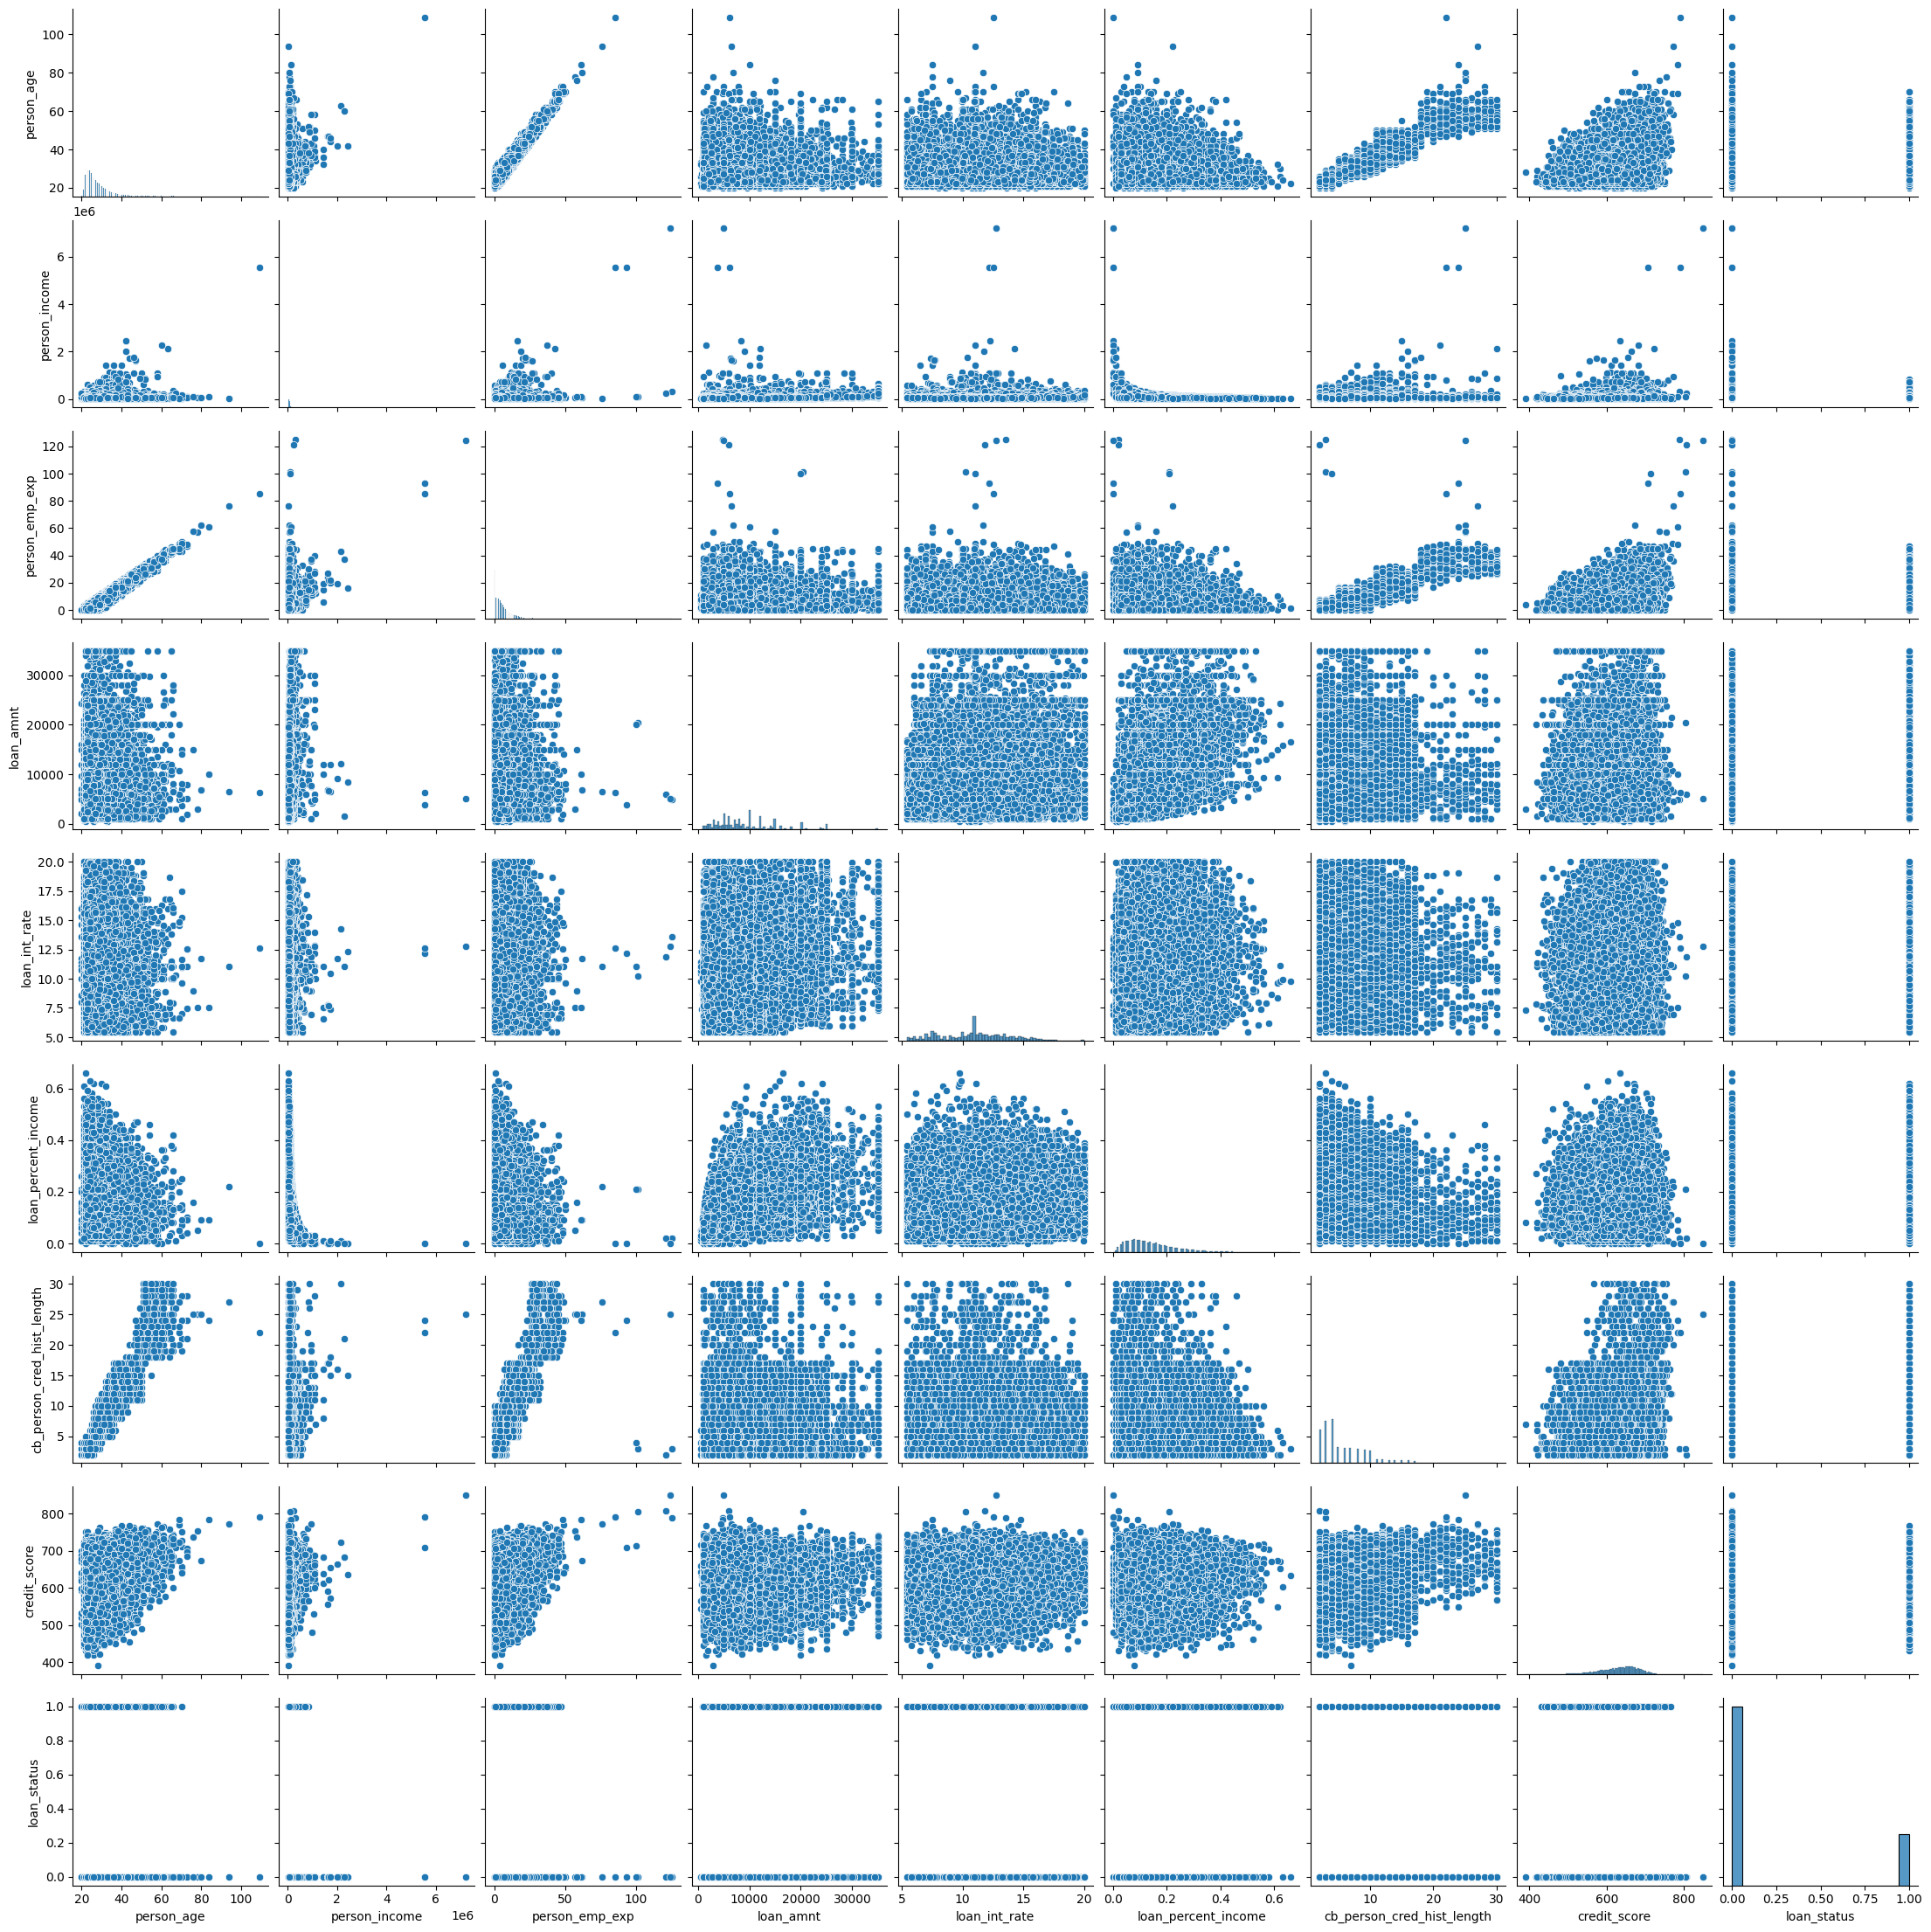

In [43]:
# checking pairplot
sns.pairplot(df)

In [44]:
# imputing all missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    elif df[col].dtype == 'float64' or df[col].dtype == 'int64':
        df[col] = df[col].fillna(df[col].median())

- now missing value has been treated.

In [45]:
# dividing data into independent and dependent x,y
X=df.drop("loan_status",axis=1)
y=df["loan_status"]
# creating dummy
obj=X.select_dtypes(include="object")
X=pd.get_dummies(X,drop_first=True)

In [46]:
# replace values true as 1 and false as o
X=X.replace(True,1)
X=X.replace(False,0)
X.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_male,person_education_Bachelor,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0.0,35000.0,16.02,0.49,3.0,561.0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,21.0,12282.0,0.0,1000.0,11.14,0.08,2.0,504.0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,25.0,12438.0,3.0,5500.0,12.87,0.44,3.0,635.0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,23.0,79753.0,0.0,35000.0,15.23,0.44,2.0,675.0,0,1,...,0,0,0,1,0,0,1,0,0,0
4,24.0,66135.0,1.0,35000.0,14.27,0.53,4.0,586.0,1,0,...,1,0,0,1,0,0,1,0,0,0


In [47]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(36000, 22)
(36000,)
(4500, 22)
(4500,)
(4501, 22)
(4501,)


(None, None)

## Model Building

### checking performance of all model


The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

In [48]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    TP = confusion_matrix(target, model.predict(predictors))[1, 1]
    FP = confusion_matrix(target, model.predict(predictors))[0, 1]
    FN = confusion_matrix(target, model.predict(predictors))[1, 0]


    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
          },
        index=[0],
    )

    return df_perf

In [49]:
from sklearn import metrics
scorer = metrics.make_scorer(metrics.recall_score)

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [50]:

from sklearn.ensemble import BaggingClassifier # Import the BaggingClassifier from the sklearn.ensemble module
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import pandas as pd


models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1))) # BaggingClassifier should now be recognized
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

scorer = metrics.make_scorer(metrics.recall_score)

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_valid, model.predict(X_valid))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic regression: 0.38594730238393976
Bagging: 0.7612296110414053
Random forest: 0.766624843161857
GBM: 0.7643663739021329
Adaboost: 0.7720200752823085
Xgboost: 0.8015056461731493
dtree: 0.7779171894604767

Validation Performance:

Logistic regression: 0.39261418853255586
Bagging: 0.7521865889212828
Random forest: 0.7531584062196307
GBM: 0.760932944606414
Adaboost: 0.7619047619047619
Xgboost: 0.7920310981535471
dtree: 0.7580174927113703


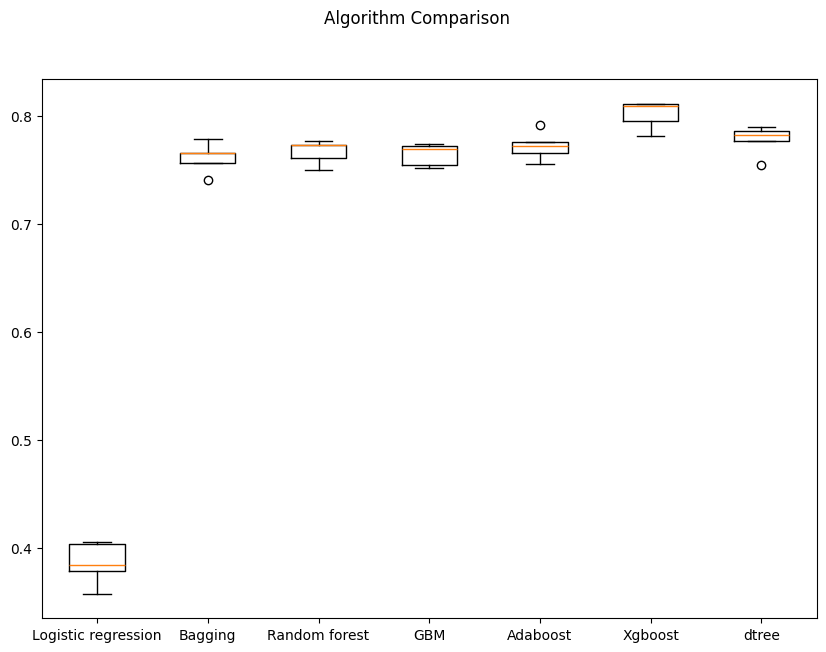

In [51]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

- Recall value is highest for Xgboost followed by Adaboost Classifier,Gbm Classifier, and D_tree Classifier.

## Model tuning

Model tuning GBM

In [53]:
%%time

# Import necessary libraries
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV # Import RandomizedSearchCV



# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 1} with CV score=0.8012547051442912:
CPU times: user 10.7 s, sys: 900 ms, total: 11.6 s
Wall time: 5min 35s


In [54]:
# Creating new pipeline with best parameters
tuned_gbm = GradientBoostingClassifier(
    max_features=0.5,
    random_state=1,
    learning_rate=1,
    n_estimators=125,
    subsample=0.7
)

tuned_gbm.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_features=0.5, n_estimators=125,
                           random_state=1, subsample=0.7)

In [55]:
gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, X_train, y_train
)
gbm_train_perf

,Accuracy,Recall,Precision,F1
0,0.948806,0.846675,0.915728,0.879849


In [57]:
gbm_val_perf = model_performance_classification_sklearn(tuned_gbm, X_valid, y_valid)
gbm_val_perf

,Accuracy,Recall,Precision,F1
0,0.923333,0.799806,0.855509,0.82672


Model tuning Adaboost

In [61]:
# %%time

# # defining model
# Model = AdaBoostClassifier(random_state=1)

# # Parameter grid to pass in RandomSearchCV
# param_grid = {
#     "n_estimators": [100, 150, 200],
#     "learning_rate": [0.2, 0.05],
#     "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
#     ]
# }


# #Calling RandomizedSearchCV
# randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# #Fitting parameters in RandomizedSearchCV
# randomized_cv.fit(X_train,y_train) ## Complete the code to fit the model on over sampled data

# print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [60]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.7846925972396488:
CPU times: user 19.9 s, sys: 1.43 s, total: 21.3 s
Wall time: 10min 58s


In [64]:
# # Creating new pipeline with best parameters
# tuned_ada = AdaBoostClassifier(
#     n_estimators= 200, learning_rate= 0.2, estimator= DecisionTreeClassifier(max_depth=2, random_state=1)
# )

# tuned_ada.fit(X_train, y_train)

In [65]:
# Creating new pipeline with best parameters
tuned_ada = AdaBoostClassifier(
    n_estimators=200, learning_rate=0.2, estimator=DecisionTreeClassifier(max_depth=2, random_state=1)
)

tuned_ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.2, n_estimators=200)

In [66]:
ada_train_perf = model_performance_classification_sklearn(tuned_ada, X_train, y_train)
ada_train_perf

,Accuracy,Recall,Precision,F1
0,0.93375,0.79862,0.890833,0.84221


In [67]:
ada_val_perf = model_performance_classification_sklearn(tuned_ada, X_valid, y_valid)
ada_val_perf

,Accuracy,Recall,Precision,F1
0,0.927111,0.780369,0.887293,0.830403


Model tuning Xgboost

In [68]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.966750313676286:
CPU times: user 5.61 s, sys: 912 ms, total: 6.52 s
Wall time: 3min 24s


In [69]:
xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.8,
    scale_pos_weight=10,
    n_estimators=250,
    learning_rate=0.2,
    gamma=0,
)

xgb2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=250,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [70]:
xgb2_train_perf = model_performance_classification_sklearn(
    xgb2, X_train, y_train
)
xgb2_train_perf

,Accuracy,Recall,Precision,F1
0,0.965722,1.0,0.865928,0.928147


In [71]:
xgb2_val_perf = model_performance_classification_sklearn(xgb2, X_valid, y_valid)
xgb2_val_perf

,Accuracy,Recall,Precision,F1
0,0.906222,0.905734,0.741448,0.815398


- Adaboost is performing better then ohers.
- adaboost is our best model

In [72]:
# Let's check the performance on test set
ada_test = model_performance_classification_sklearn(tuned_ada, X_test, y_test)
ada_test

,Accuracy,Recall,Precision,F1
0,0.926683,0.779221,0.87739,0.825397


- Adaboost is performing well on test set.
- lets check feature importance.

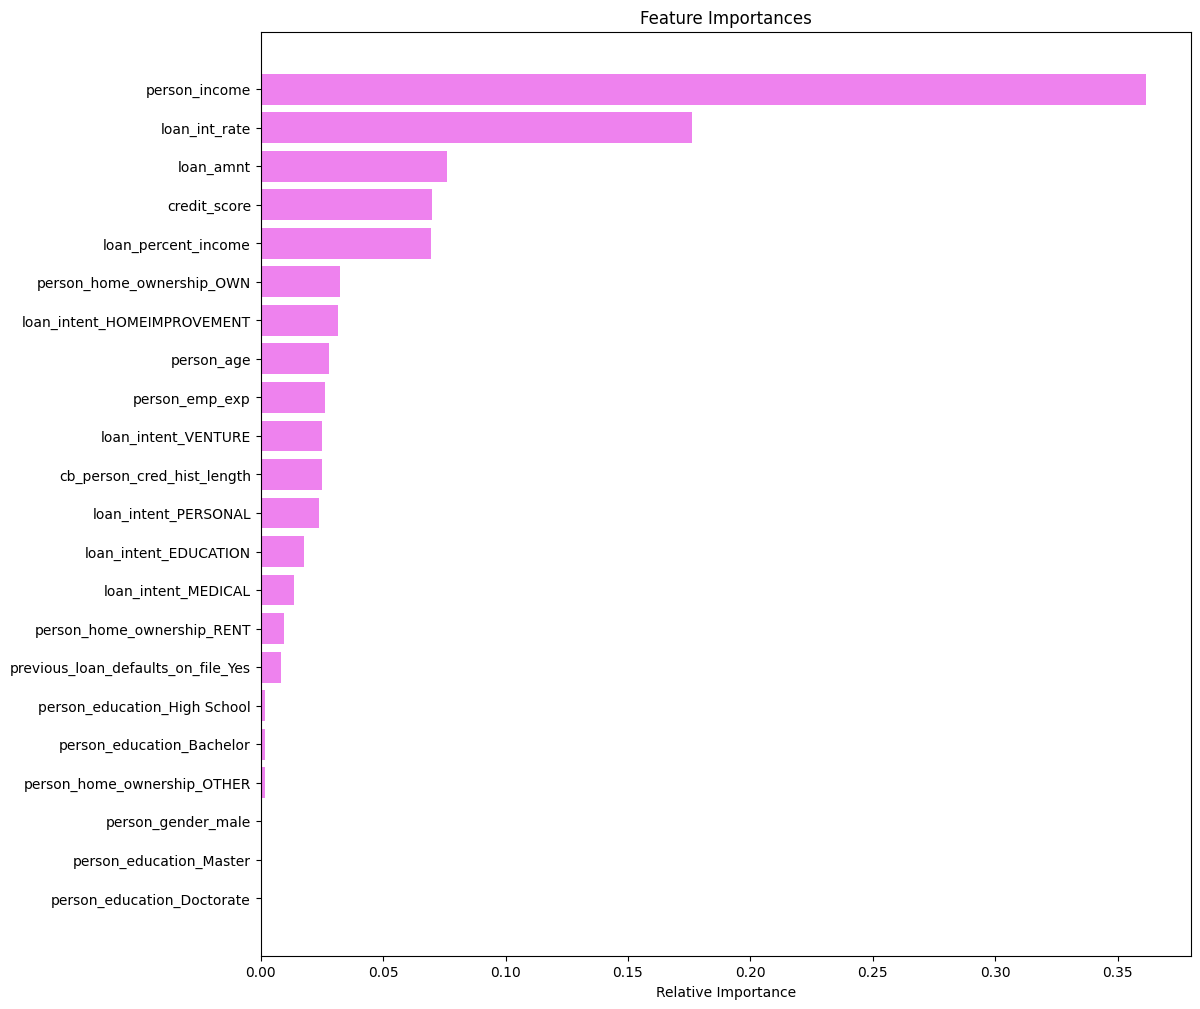

In [73]:
feature_names = X_train.columns
importances = tuned_ada.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- personal income is important feature followed by loan_int_rate, loan amount, credit score so on so forth.

## Let's use Pipelines to build the final model

In [77]:
# from sklearn.pipeline import Pipeline # Importing the Pipeline class from sklearn.pipeline
# from sklearn.impute import SimpleImputer # Importing the SimpleImputer class from sklearn.impute
# from sklearn.ensemble import AdaBoostClassifier # Importing the AdaBoostClassifier class from sklearn.ensemble
# from sklearn.tree import DecisionTreeClassifier # Importing the DecisionTreeClassifier class from sklearn.tree


# Pipeline_model = Pipeline(
#    steps=[
#         ("imputer", SimpleImputer(strategy="median")),
#         (
#             "AdaBoost Classifier",
#              AdaBoostClassifier(
#                 random_state=1,
#                 learning_rate=0.2,
#                 n_estimators=200,
#                 estimator= DecisionTreeClassifier(max_depth=3, random_state=1),
#             ),
#        ),
#     ]
# )

In [86]:


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


Pipeline_model = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        (
            "AdaBoost Classifier",
            AdaBoostClassifier(
                n_estimators=200, learning_rate=0.2, estimator=DecisionTreeClassifier(max_depth=2, random_state=1)
            ),
        ),
    ]
)

# Example usage (assuming X_train and y_train are defined)
Pipeline_model.fit(X_train, y_train)
Pipeline_predictions = Pipeline_model.predict(X_test)

# Evaluate the pipeline
print(classification_report(y_test, Pipeline_predictions))

# Example usage (assuming X_train and y_train are defined)
Pipeline_model.fit(X_train, y_train)
Pipeline_predictions = Pipeline_model.predict(X_test)

# Evaluate the pipeline
print(classification_report(y_test, Pipeline_predictions))


              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      3500
         1.0       0.88      0.78      0.83      1001

    accuracy                           0.93      4501
   macro avg       0.91      0.87      0.89      4501
weighted avg       0.93      0.93      0.93      4501



In [85]:
# Let's check the performance on test set
Pipeline_model_test = model_performance_classification_sklearn(Pipeline_model, X_test, y_test)
Pipeline_model_test

,Accuracy,Recall,Precision,F1
0,0.926683,0.779221,0.87739,0.825397


## conclusion & Recommendation

In [87]:
# Find out probabilities and predictions on test set
pred = tuned_ada.predict(X_test)
prob = tuned_ada.predict_proba(X_test)

In [88]:
# creating a dataframe for the predicted, original and probabilities predicted by model
result = pd.DataFrame(
    np.transpose([y_test, pred, prob[:, 1]]),
    columns=["Original", "Predicted", "Probability"],
)

In [89]:
# Let's add label of FN, FP, TP, TN based on predicted values


def Label(df):
    if (df["Predicted"] == 0) & (df["Original"] == 0):
        return "TN"

    elif (df["Predicted"] == 1) & (df["Original"] == 1):
        return "TP"

    elif df["Predicted"] > df["Original"]:
        return "FP"

    elif df["Predicted"] < df["Original"]:
        return "FN"

In [90]:
result["Label"] = result.apply(Label, axis=1)

In [91]:
# This is the final dataframe, which we can use to see if some pattern exists
result.head()

,Original,Predicted,Probability,Label
0,1.0,1.0,0.511811,TP
1,0.0,0.0,0.499530,TN
2,0.0,0.0,0.344956,TN
3,0.0,0.0,0.314036,TN
4,0.0,0.0,0.361305,TN


In [92]:
# # With the threshold being 0.50, there could be some point near to the threshold which could be misclassified by the model
# # but they could be later analyzed by the team to decide if we can take a call on those samples

# result[(result["Probability"] > 0.45) & (result["Probability"] < 0.5)][
#     "Label"
# ].value_counts()

,count
Label,
TN,1049
FN,221


- If the threshold would have been 0.45 instead of 0.5, we will be able to classify 21 FN as TP and 2399 TN as FP
- Changing the threshold can further help reduce the cost and such a call can be made by looking at probabilities at later stages, as changing the threshold directly might not help always.